In [109]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [86]:
image = cv.imread('./images/emma.jpg', cv.IMREAD_GRAYSCALE)
print(image.shape)

(810, 720)


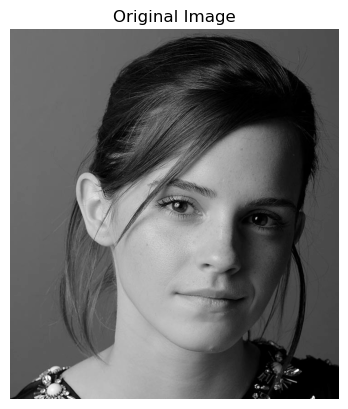

In [87]:
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [91]:
def intensity_transformation(image):
    image_copy = image.copy()
    shape = image.shape
    height = shape[0]
    width = shape[1]
    for i in range(height):
        for j in range(width):
            value = image[i][j]
            if (value < 150 ):
                image_copy[i][j] = value+100
    return image_copy

In [92]:
image_transformed = intensity_transformation(image)

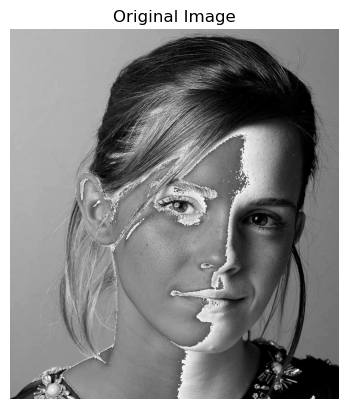

In [93]:
plt.imshow(image_transformed, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [94]:
image2 = cv.imread('./images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)


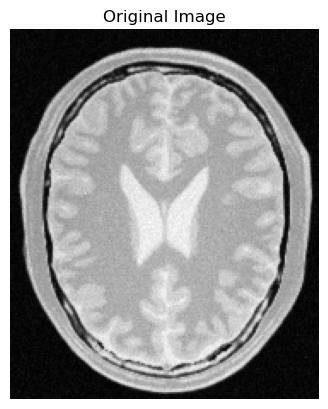

In [95]:
plt.imshow(image2, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [105]:
def intensity_transformation_white_matter(image):
    image_copy = image.copy()
    shape = image.shape
    height = shape[0]
    width = shape[1]
    for i in range(height):
        for j in range(width):
            value = image[i][j]
            if (value < 175 ):
                image_copy[i][j] = 0
    return image_copy

In [106]:
image2_transformed = intensity_transformation_white_matter(image2)

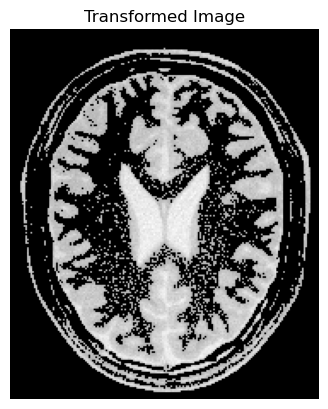

In [107]:
plt.imshow(image2_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')
plt.show()

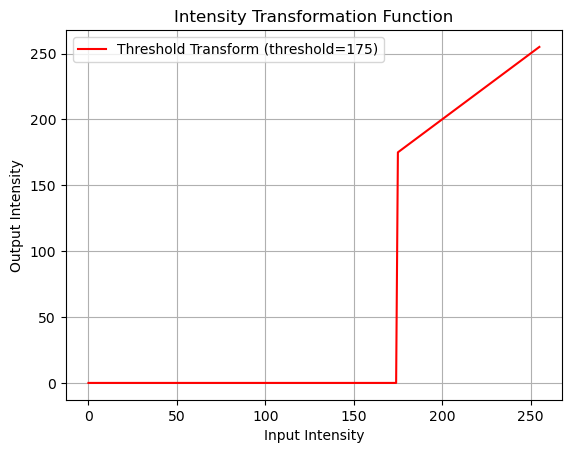

In [117]:
x = np.arange(0, 256)
y = x.copy()
for i in range(len(x)):
    if x[i] < 175:
        y[i] = 0

plt.plot(x,y, label='Threshold Transform (threshold=175)', color='red')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.legend()
plt.grid(True)
plt.show()


In [118]:
def intensity_transformation_gray_matter(image):
    image_copy = image.copy()
    shape = image.shape
    height = shape[0]
    width = shape[1]
    for i in range(height):
        for j in range(width):
            value = image[i][j]
            if (value < 125 or value >175 ):
                image_copy[i][j] = 0
    return image_copy

In [119]:
image2_transformed_gray_matter = intensity_transformation_gray_matter(image2)

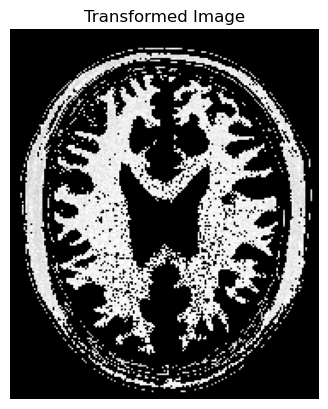

In [120]:
plt.imshow(image2_transformed_gray_matter, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')
plt.show()

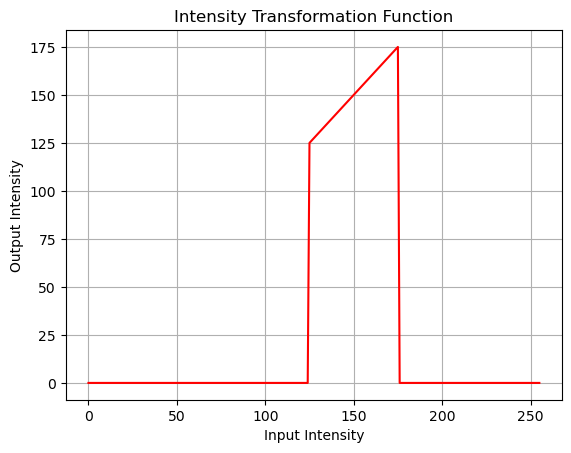

In [122]:
x2 = np.arange(0, 256)
y2 = x.copy()
for i in range(len(x2)):
    if x2[i] < 125 or x2[i]>175 :
        y2[i] = 0

plt.plot(x2,y2, color='red')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.show()

## Gamma Correction


In [130]:
image3 = cv.imread('./images/highlights_and_shadows.jpg')
image3_rgb = cv.cvtColor(image3, cv.COLOR_BGR2RGB)

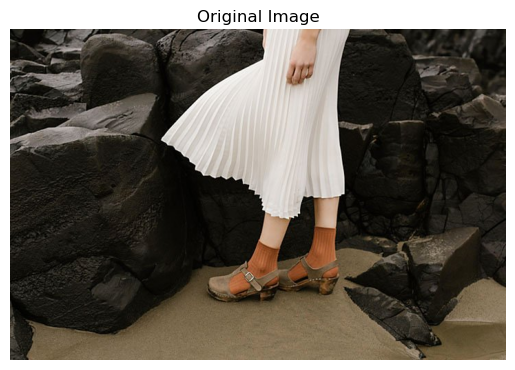

In [131]:
plt.imshow(image3_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [137]:
def gamma_correction(image,gamma):
   
    image_lab = cv.cvtColor(image, cv.COLOR_RGB2LAB)
    
    L, a, b = cv.split(image_lab)
    
    # Normalize L channel to [0,1]
    L_norm = L / 255.0
    
    # Apply gamma correction on normalized L channel
    L_gamma = np.power(L_norm, gamma)
    
    # Scale back to [0,255]
    L_corrected = np.uint8(L_gamma * 255)
    
    # Merge channels back
    lab_corrected = cv.merge([L_corrected, a, b])
    
    # Convert back to BGR
    corrected_img = cv.cvtColor(lab_corrected, cv.COLOR_LAB2RGB)
    
    return corrected_img

In [148]:
image3_corrected = gamma_correction(image3_rgb,1.8)

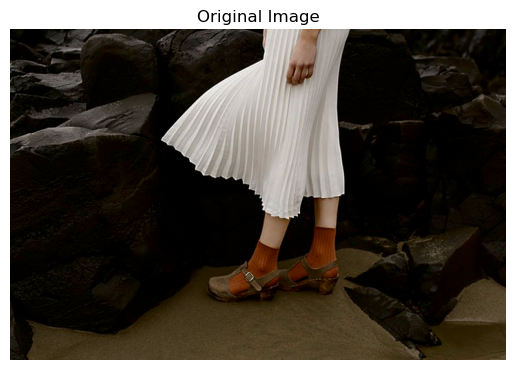

In [149]:
plt.imshow(image3_corrected)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [157]:
def plot_histograms(image, title):
    colors = ('r', 'g', 'b') 
    plt.figure(figsize=(12,4))
    for i, color in enumerate(colors):
        hist = cv.calcHist([image], [i], None, [256], [0,256])
        plt.plot(hist, color=color, label=f'{color.upper()} channel')
        plt.xlim([0,256])
    plt.title(f'{title} Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

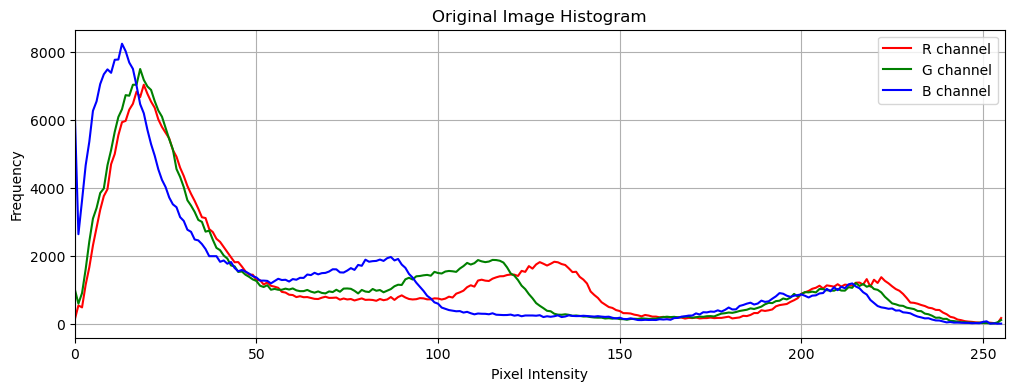

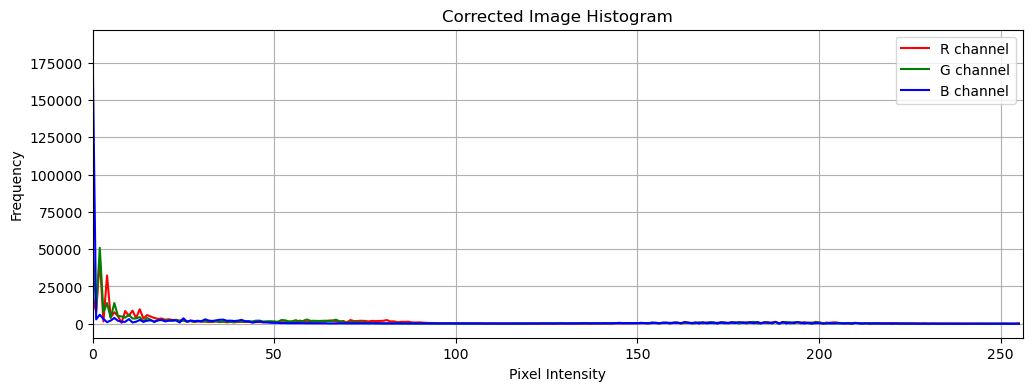

In [159]:
plot_histograms(image3_rgb, "Original Image")
plot_histograms(image3_corrected , "Corrected Image")

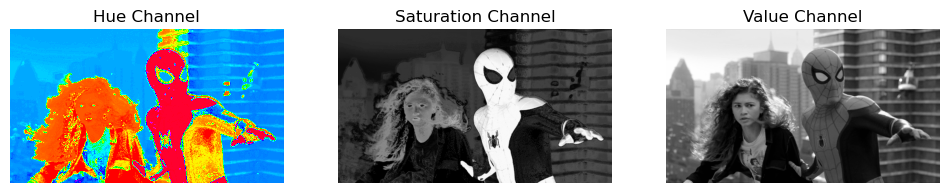

In [175]:
# Load your image (BGR)
image4 = cv.imread('./images/spider.png')

# Convert to HSV color space
hsv_image = cv.cvtColor(image4, cv.COLOR_BGR2HSV)

# Split into H, S, V channels
h, s, v = cv.split(hsv_image)

# Display the channels using matplotlib
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(h, cmap='hsv')  # Hue channel uses HSV colormap
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(s, cmap='gray')  # Saturation is grayscale
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(v, cmap='gray')  # Value is grayscale
plt.title('Value Channel')
plt.axis('off')

plt.show()

In [176]:
def intensity_transformation_saturation_plane(s , alpha ,sigma = 70):
    # Convert to float32
    x = s.astype(np.float32)
    s_transformed = np.minimum( x + alpha * 128 * np.exp(- ((x - 128)**2) / (2 * (sigma**2))) , 255)
    return s_transformed.astype(np.uint8)

In [182]:
s_transformed = intensity_transformation_saturation_plane(s , 1 )

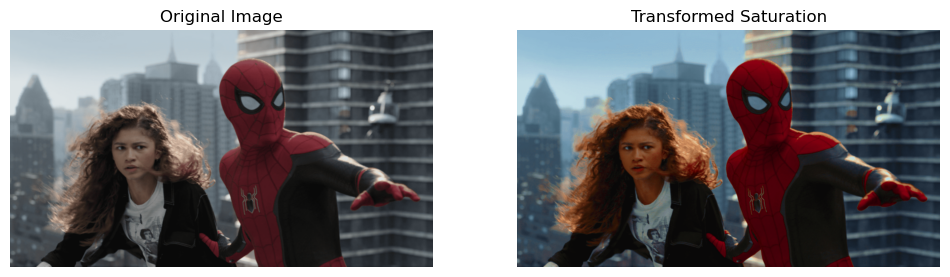

In [183]:
hsv_transformed = cv.merge([h, s_transformed, v])
result = cv.cvtColor(hsv_transformed, cv.COLOR_HSV2RGB)

image4_rgb = cv.cvtColor(image4, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image4_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(result)
plt.title(f'Transformed Saturation')
plt.axis('off')

plt.show()

In [198]:
image5 = cv.imread("./images/shells.tif", cv.IMREAD_GRAYSCALE)

hist, bins = np.histogram(image5.flatten(), bins=256, range=[0,256])



In [199]:
print(hist)

[    0     0     0     0     0     0     0     0     0     0     0     0
     0 17718    96   506  1750  9441  1642 16457 10381  2945  6149  1038
  4566   961  4562  2446  2641  5860  1861  3850  2016  4290  3081  6031
  2830  4868  7185  4197  3696  3911  6814  1379  7094  1295  6812  9944
  2898  5615  2791  5118  3819  3533  3482  5679  5933  1008  4599  2546
  4007   752  3433   690  1939  3544  2668   533  2482  1359  1336  1408
  1778   884  2373  1419   830   949   116   150     5    10     0     1
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [190]:
print(bins)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [200]:
# 2. Normalize histogram (PDF)
pdf = hist / np.sum(hist)
print(pdf)

[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 7.0872e-02 3.8400e-04 2.0240e-03 7.0000e-03 3.7764e-02
 6.5680e-03 6.5828e-02 4.1524e-02 1.1780e-02 2.4596e-02 4.1520e-03
 1.8264e-02 3.8440e-03 1.8248e-02 9.7840e-03 1.0564e-02 2.3440e-02
 7.4440e-03 1.5400e-02 8.0640e-03 1.7160e-02 1.2324e-02 2.4124e-02
 1.1320e-02 1.9472e-02 2.8740e-02 1.6788e-02 1.4784e-02 1.5644e-02
 2.7256e-02 5.5160e-03 2.8376e-02 5.1800e-03 2.7248e-02 3.9776e-02
 1.1592e-02 2.2460e-02 1.1164e-02 2.0472e-02 1.5276e-02 1.4132e-02
 1.3928e-02 2.2716e-02 2.3732e-02 4.0320e-03 1.8396e-02 1.0184e-02
 1.6028e-02 3.0080e-03 1.3732e-02 2.7600e-03 7.7560e-03 1.4176e-02
 1.0672e-02 2.1320e-03 9.9280e-03 5.4360e-03 5.3440e-03 5.6320e-03
 7.1120e-03 3.5360e-03 9.4920e-03 5.6760e-03 3.3200e-03 3.7960e-03
 4.6400e-04 6.0000e-04 2.0000e-05 4.0000e-05 0.0000e+00 4.0000e-06
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000

In [201]:
# 3. Compute CDF (Cumulative Distribution Function)
cdf = np.cumsum(pdf)
print(cdf)

[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.070872 0.071256 0.07328
 0.08028  0.118044 0.124612 0.19044  0.231964 0.243744 0.26834  0.272492
 0.290756 0.2946   0.312848 0.322632 0.333196 0.356636 0.36408  0.37948
 0.387544 0.404704 0.417028 0.441152 0.452472 0.471944 0.500684 0.517472
 0.532256 0.5479   0.575156 0.580672 0.609048 0.614228 0.641476 0.681252
 0.692844 0.715304 0.726468 0.74694  0.762216 0.776348 0.790276 0.812992
 0.836724 0.840756 0.859152 0.869336 0.885364 0.888372 0.902104 0.904864
 0.91262  0.926796 0.937468 0.9396   0.949528 0.954964 0.960308 0.96594
 0.973052 0.976588 0.98608  0.991756 0.995076 0.998872 0.999336 0.999936
 0.999956 0.999996 0.999996 1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.       1.       1.       1.
 1.       1

In [203]:
cdf_normalized = np.round(cdf * 255).astype(np.uint8)
print(cdf_normalized)

[  0   0   0   0   0   0   0   0   0   0   0   0   0  18  18  19  20  30
  32  49  59  62  68  69  74  75  80  82  85  91  93  97  99 103 106 112
 115 120 128 132 136 140 147 148 155 157 164 174 177 182 185 190 194 198
 202 207 213 214 219 222 226 227 230 231 233 236 239 240 242 244 245 246
 248 249 251 253 254 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

In [204]:
equalized_img = cdf_normalized[image5]

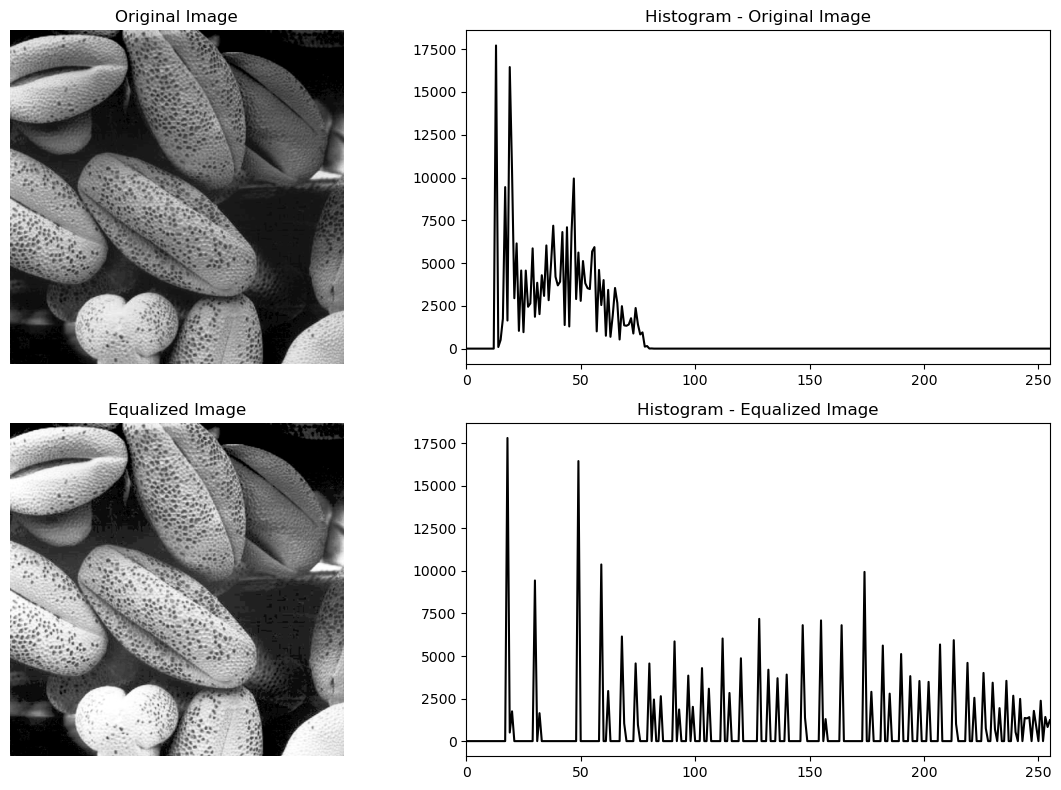

In [206]:
hist_eq, bins_eq = np.histogram(equalized_img.flatten(), bins=256, range=[0,256])

# Plot images and histograms
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image5, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Histogram of original image
plt.subplot(2, 2, 2)
plt.plot(hist, color='black')
plt.title('Histogram - Original Image')
plt.xlim([0, 255])

# Equalized image
plt.subplot(2, 2, 3)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Histogram of equalized image
plt.subplot(2, 2, 4)
plt.plot(hist_eq, color='black')
plt.title('Histogram - Equalized Image')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

## 6


In [208]:
image6 = cv.imread("./images/jeniffer.jpg")
image6_rgb = cv.cvtColor(image6 , cv.COLOR_BGR2RGB)

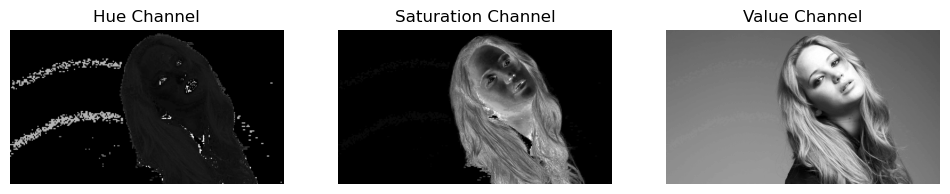

In [209]:
# Convert to HSV color space
hsv_image6 = cv.cvtColor(image6, cv.COLOR_BGR2HSV)

# Split into H, S, V channels
h, s, v = cv.split(hsv_image6)

# Display the channels using matplotlib
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(h, cmap='gray')  # Hue channel uses HSV colormap
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(s, cmap='gray')  # Saturation is grayscale
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(v, cmap='gray')  # Value is grayscale
plt.title('Value Channel')
plt.axis('off')

plt.show()

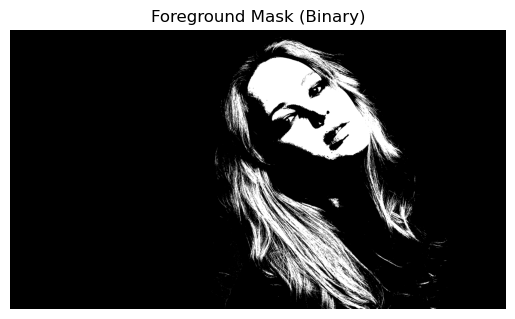

In [225]:
# Choose the plane to threshold (example: Value channel)
plane_to_threshold = v

# Apply binary thresholding (try different thresholds, here 100 is example)
ret, foreground_mask = cv.threshold(plane_to_threshold, 160, 255, cv.THRESH_BINARY)

# Display the mask
plt.imshow(foreground_mask, cmap='gray')
plt.title('Foreground Mask (Binary)')
plt.axis('off')
plt.show()

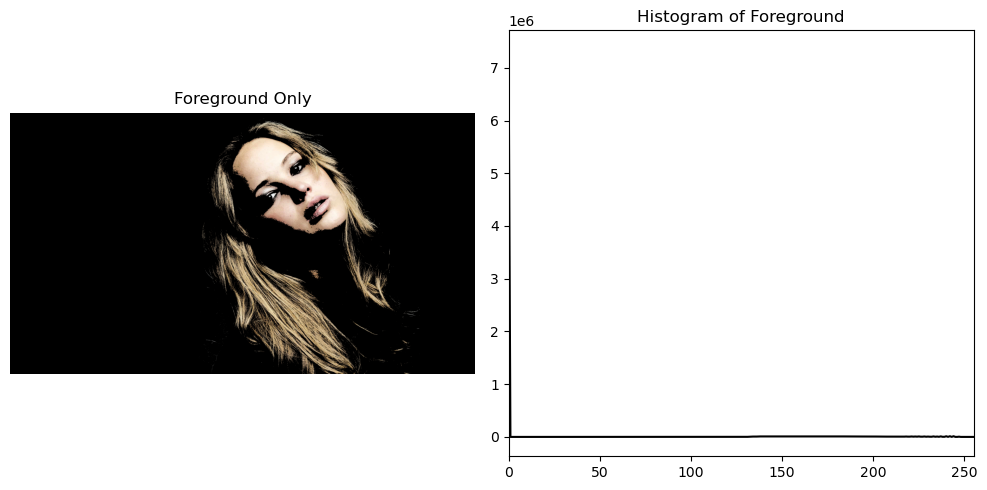

In [227]:
# --- Obtain foreground using bitwise_and ---
foreground_only = cv.bitwise_and(image6, image6, mask=foreground_mask)

# --- Convert to grayscale for histogram calculation ---
foreground_gray = cv.cvtColor(foreground_only, cv.COLOR_BGR2GRAY)

# Compute histogram of foreground
hist_foreground = cv.calcHist([foreground_gray], [0], None, [256], [0,256])

# --- Plot results ---
plt.figure(figsize=(10,5))

# Show foreground-only image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(foreground_only, cv.COLOR_BGR2RGB))
plt.title('Foreground Only')
plt.axis('off')

# Plot histogram
plt.subplot(1, 2, 2)
plt.plot(hist_foreground, color='black')
plt.title('Histogram of Foreground')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()